In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

In [2]:
dfA = pd.read_csv('feature_sets\FeaturesSetA.csv')
dfB = pd.read_csv('feature_sets\FeaturesSetB.csv')

In [3]:
Xa = dfA.drop(columns='Class')
dfA['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
ya = dfA['Class']
Xb = dfB.drop(columns='Class')
dfB['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
yb = dfB['Class']


In [4]:
seed = 1
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, test_size=0.20, random_state=seed)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb, test_size=0.20, random_state=seed)


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=seed)
Xa_res, ya_res = rus.fit_resample(Xa_train, ya_train)
Xb_res, ya_res = rus.fit_resample(Xb_train, yb_train)

In [6]:
sm = SMOTE(random_state=seed)
Xa_sm, ya_sm = sm.fit_resample(Xa_train, ya_train)
Xb_sm, yb_sm = sm.fit_resample(Xb_train, yb_train)


In [7]:
rf= RandomForestClassifier(n_estimators = 100, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=seed)
rf.fit(Xa_train, ya_train)
ya_proba = rf.predict_proba(Xa_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [8]:
rf.fit(Xb_train, yb_train)
yb_proba = rf.predict_proba(Xb_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


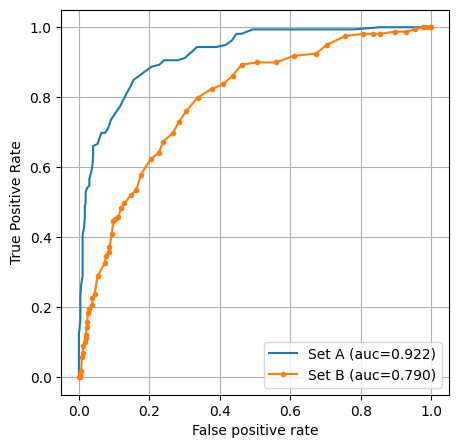

In [10]:
fpr_a, tpr_a, tresh_a = roc_curve(np.array(ya_test),ya_proba[:,1], pos_label=1)
auc_a = auc(fpr_a, tpr_a)
fpr_b, tpr_b, tresh_b = roc_curve(np.array(yb_test),yb_proba[:,1], pos_label=1)
auc_b = auc(fpr_b, tpr_b)
plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_a, tpr_a, linestyle='-', label='Set A (auc=%0.3f)' % auc_a)
plt.plot(fpr_b, tpr_b, marker='.', label='Set B (auc=%0.3f)' % auc_b)
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()